<a href="https://colab.research.google.com/github/fabianlgomez/mpd-PlaylistSimilarity-unal/blob/main/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from pathlib import Path
root = Path().resolve()
out = Path(root/'data/processed_for_prediction')

# Cargar los DataFrames desde Parquet
df_playlist = pd.read_parquet(out/'df_playlist_with_clusters.parquet')
df_tracks = pd.read_parquet(out/'df_processed_full.parquet')
playlist_umap = pd.read_parquet(out/'playlist_umap.parquet')


# Ahora puedes trabajar con ellos como cualquier DataFrame de pandas
df_playlist.head()

,pid,avg_bpm,avg_energy,avg_danceability_ll,avg_loudness,danceability_danceable,gender_female,genre_dortmund_alternative,genre_dortmund_blues,genre_dortmund_electronic,...,moods_mirex_Cluster5,timbre_bright,tonal_atonal_atonal,voice_instrumental_voice,total_duration_ms,n_tracks,name,playlist_labels_hdbscan,playlist_labels_kmeans,cluster_hybrid
0,1000000,-0.158348,0.396294,-0.700306,0.125202,0.363061,0.371108,-0.484566,-0.361109,0.435491,...,0.067093,-0.735381,1.052521,0.084001,523715,3,Party,13,0,2
1,1000001,-0.512764,0.251691,0.040809,-0.416864,-0.915044,0.089547,-0.372681,-0.116873,0.381763,...,0.527874,0.203971,0.131274,-0.285914,3294637,10,Oldies,38,1,4
2,1000009,0.417665,0.803308,-0.719781,-0.689314,-0.952088,-0.402470,0.134985,1.360055,-0.896558,...,-0.944949,0.086277,-0.089870,0.502085,948799,5,Study Music,-1,3,5
3,1000016,-0.502793,-0.661331,-0.120105,0.180342,0.682097,-0.612838,-0.260205,-0.319518,0.375747,...,-0.656781,0.861908,-0.326220,0.386508,594092,3,school,33,5,1
4,1000020,-1.077283,-0.688983,0.546987,0.640798,0.783371,-1.097435,0.774962,0.549553,-0.859564,...,-0.905760,0.377803,0.092759,0.883734,187720,1,Modern Music,-1,1,4


In [2]:

df_tracks.head()

,pid,name,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,...,timbre_bright,timbre_dark,tonal_atonal_prob,tonal_atonal_tonal,voice_instrumental_prob,voice_instrumental_instrumental,voice_instrumental_voice,energy_cat,danceability_ll_cat,bpm_cat
0,1000000,Party,0,AronChupa,spotify:track:66U0ASk1VHZsqIkpMjKX3B,spotify:artist:5vCOdeiQt9LyzdI87kt5Sh,Little Swing,spotify:album:4S5MLjwRSi0NJ5nikflYnZ,163809,Little Swing,...,-1.441935,1.441935,0.975945,-1.124915,0.423583,-0.680423,0.680423,medio,bajo,medio
1,1000000,Party,1,AronChupa,spotify:track:5MhsZlmKJG6X5kTHkdwC4B,spotify:artist:5vCOdeiQt9LyzdI87kt5Sh,I'm an Albatraoz,spotify:album:1qHVYbxQ6IS8YRviorKDJI,166848,I'm an Albatraoz,...,0.130479,-0.130479,0.455472,-0.917807,-0.716425,1.320410,-1.320410,medio,bajo,medio
2,1000000,Party,4,Lorde,spotify:track:3G6hD9B2ZHOsgf4WfNu7X1,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,Team,spotify:album:0rmhjUgoVa17LZuS8xWQ3v,193058,Pure Heroine,...,-0.894687,0.894687,0.950635,-1.114843,0.907798,-0.891989,0.891989,medio,bajo,bajo
3,1000016,school,0,Alesso,spotify:track:6WQLkih8nE0JdUCEyLaGnQ,spotify:artist:4AVFqumd2ogHFlRbKIjp1t,Heroes (we could be),spotify:album:3yqh9ozOA2cAgPUJaveAuG,210012,Forever,...,0.538302,-0.538302,0.464637,-0.921454,0.182450,-0.575065,0.575065,bajo,bajo,medio
4,1000016,school,3,American Authors,spotify:track:5j9iuo3tMmQIfnEEQOOjxh,spotify:artist:0MlOPi3zIDMVrfA9R04Fe3,Best Day Of My Life,spotify:album:2AAVQqcejMEgNpdg2raPYE,194240,"Oh, What A Life",...,1.101788,-1.101788,-0.160977,1.078768,-1.783004,0.283694,-0.283694,bajo,medio,bajo


In [3]:

if "cluster_hybrid_x"  in playlist_umap.columns:
  playlist_umap["cluster_hybrid"] =  playlist_umap["cluster_hybrid_x"]
  playlist_umap.drop(columns=["cluster_hybrid_x"], inplace=True)
if "cluster_hybrid_y"  in playlist_umap.columns:
  playlist_umap.drop(columns=["cluster_hybrid_y"], inplace=True)

if "playlist_labels_hdbscan_x"  in playlist_umap.columns:
  if "playlist_labels_hdbscan" not in playlist_umap.columns:
    playlist_umap["playlist_labels_hdbscan"] =  playlist_umap["playlist_labels_hdbscan_x"]
  playlist_umap.drop(columns=["playlist_labels_hdbscan_x"], inplace=True)
if "playlist_labels_hdbscan_y"  in playlist_umap.columns:
  playlist_umap.drop(columns=["playlist_labels_hdbscan_y"], inplace=True)

playlist_umap.head()

,UMAP_1,UMAP_2,playlist_labels_hdbscan,cluster_hybrid
pid,,,,
1000000,17.085173,-0.839397,13,2
1000016,6.023946,3.598349,33,1
1000020,8.524440,1.867325,-1,4
1000023,9.937390,6.673456,74,4
1000040,4.498182,0.070753,52,5


##Plan Inicial
1. **crear un modelo de clasificación base:** (Basado en los clusters generados con kmeans). Usaremos XGBoost porque en la literatura se encuentra que es  más interpretable que una NN y mejor con el overfitting que un algorítmo basado en árboles como AdaBoost o RandomForest vamos a usar L1 o L2 para tratar el overfitting
2. **crear un modelo de clasificación secuencial:** tenemos que crear las secuencias, en una matriz y luego vamos a aplicar Bi‑GRU/LSTM s o un transformer
3. **crear servicio de recomendación:** por ahora hay tres opciones

  a. Content‑based: usar vector de playlist + k‑NN por coseno
  
  b. Hybrid:
  1️⃣ Clasificador → cluster más probable
  2️⃣ Dentro del cluster, recomendar por similitud de embedding o top N populares
  
  c. Secuencia: Transformer next‑track para “añade X canciones”

4. (si hay tiempo) Rellenar canciones en las playlist vacías originales: creo que se podría hacer a partir de los nombres


#Probando con los clusters dbscan

##1. Modelo de clasificación base

In [9]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

cluster_column = 'playlist_labels_hdbscan'

def xgboost_model(df_playlist, cluster_column):
  y = df_playlist[cluster_column].astype(int)
  # Create a list of columns to drop that are present in the DataFrame
  cols_to_drop = [col for col in [cluster_column, 'name', 'pid', 'playlist_labels_kmeans', "cluster_hybrid"] if col in df_playlist.columns]
  X = df_playlist.drop(columns=cols_to_drop)

  # --- FIX START ---
  # Remap HDBSCAN labels to a contiguous range starting from 0
  # XGBoost multi:softprob requires labels in [0, num_class)
  le = LabelEncoder()
  y_encoded = le.fit_transform(y)

  # Update num_class based on the number of unique remapped labels
  num_classes = len(le.classes_)
  print(f"Number of unique classes after remapping: {num_classes}")
  # --- FIX END ---

  # Load dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded) # Use y_encoded and stratify

  # Define XGBoost parameters for multiclass classification
  params = {
      'objective': 'multi:softmax',  # Use softmax for multiclass classification
      'eval_metric': 'merror',      # Metric for multiclass classification
      'num_class': num_classes,  # Use the updated number of classes
      'colsample_bytree': 0.3,
      'learning_rate': 0.05,
      'max_depth': 6,
      'alpha': 10,
      'lambda': 5         # L2
  }

  # Create DMatrix for XGBoost
  dtrain = xgb.DMatrix(X_train, label=y_train)
  dtest = xgb.DMatrix(X_test, label=y_test)

  # Train the model
  xgb_model = xgb.train(params, dtrain, num_boost_round=100)

  # Predict and evaluate
  y_pred = xgb_model.predict(dtest)
  accuracy = accuracy_score(y_test, y_pred) # Evaluate using accuracy
  print(f"Accuracy Score: {accuracy}")
  return xgb_model, le

In [7]:
df_playlist_filtered = df_playlist[df_playlist['playlist_labels_hdbscan'] != -1].copy()
xgboost_model(df_playlist_filtered, cluster_column)
xgboost_model(df_playlist, cluster_column)



Number of unique classes after remapping: 82
Accuracy Score: 0.0371900826446281
Number of unique classes after remapping: 83
Accuracy Score: 0.40939597315436244


(<xgboost.core.Booster at 0x7f6948055010>, LabelEncoder())

In [41]:
xgboost_model(playlist_umap, cluster_column)

Number of unique classes after remapping: 83
Accuracy Score: 0.40939597315436244


(<xgboost.core.Booster at 0x7d6f173f0750>, LabelEncoder())

#Probando con los clusters Híbridos

##1. Modelo de clasificación base

In [63]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

cluster_column = 'cluster_hybrid'

def xgboost_model(df_playlist, cluster_column):
  y = df_playlist[cluster_column].astype(int)
  # Create a list of columns to drop that are present in the DataFrame
  cols_to_drop = [col for col in [cluster_column, 'name', 'pid', 'playlist_labels_kmeans', "playlist_labels_hdbscan"] if col in df_playlist.columns]
  X = df_playlist.drop(columns=cols_to_drop)

  # --- FIX START ---
  # Remap HDBSCAN labels to a contiguous range starting from 0
  # XGBoost multi:softprob requires labels in [0, num_class)
  le = LabelEncoder()
  y_encoded = le.fit_transform(y)

  # Update num_class based on the number of unique remapped labels
  num_classes = len(le.classes_)
  print(f"Number of unique classes after remapping: {num_classes}")
  # --- FIX END ---

  # Load dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded) # Use y_encoded and stratify

  # Define XGBoost parameters for multiclass classification
  params = {
      'objective': 'multi:softmax',  # Use softmax for multiclass classification
      'eval_metric': 'merror',      # Metric for multiclass classification
      'num_class': num_classes,  # Use the updated number of classes
      'colsample_bytree': 0.3,
      'learning_rate': 0.05,
      'max_depth': 6,
      'alpha': 15,
      'lambda': 5         # L2
  }

  # Create DMatrix for XGBoost
  dtrain = xgb.DMatrix(X_train, label=y_train)
  dtest = xgb.DMatrix(X_test, label=y_test)

  # Train the model
  xgb_model = xgb.train(params, dtrain, num_boost_round=100)

  # Predict and evaluate
  y_pred = xgb_model.predict(dtest)
  accuracy = accuracy_score(y_test, y_pred) # Evaluate using accuracy
  print(f"Accuracy Score: {accuracy}")
  return xgb_model, le

df_playlist_filtered = df_playlist[df_playlist[cluster_column] != -1].copy()
xgboost_model(df_playlist_filtered, cluster_column)
xgboost_model(df_playlist, cluster_column)
xgboost_model(playlist_umap, cluster_column)

Number of unique classes after remapping: 7
Accuracy Score: 0.30201342281879195
Number of unique classes after remapping: 7
Accuracy Score: 0.30201342281879195
Number of unique classes after remapping: 7
Accuracy Score: 0.3148261134838316


(<xgboost.core.Booster at 0x7c9f3933c150>, LabelEncoder())

In [24]:
df_playlist_filtered.head()

,pid,avg_bpm,avg_energy,avg_danceability_ll,avg_loudness,danceability_danceable,gender_female,genre_dortmund_alternative,genre_dortmund_blues,genre_dortmund_electronic,...,moods_mirex_Cluster5,timbre_bright,tonal_atonal_atonal,voice_instrumental_voice,total_duration_ms,n_tracks,name,playlist_labels_hdbscan,playlist_labels_kmeans,cluster_hybrid
0,1000000,-0.158348,0.396294,-0.700306,0.125202,0.363061,0.371108,-0.484566,-0.361109,0.435491,...,0.067093,-0.735381,1.052521,0.084001,523715,3,Party,13,0,2
1,1000001,-0.512764,0.251691,0.040809,-0.416864,-0.915044,0.089547,-0.372681,-0.116873,0.381763,...,0.527874,0.203971,0.131274,-0.285914,3294637,10,Oldies,38,1,4
2,1000009,0.417665,0.803308,-0.719781,-0.689314,-0.952088,-0.402470,0.134985,1.360055,-0.896558,...,-0.944949,0.086277,-0.089870,0.502085,948799,5,Study Music,-1,3,5
3,1000016,-0.502793,-0.661331,-0.120105,0.180342,0.682097,-0.612838,-0.260205,-0.319518,0.375747,...,-0.656781,0.861908,-0.326220,0.386508,594092,3,school,33,5,1
4,1000020,-1.077283,-0.688983,0.546987,0.640798,0.783371,-1.097435,0.774962,0.549553,-0.859564,...,-0.905760,0.377803,0.092759,0.883734,187720,1,Modern Music,-1,1,4



#2. Modelo de clasificación secuencial


Embeddings vs. secuencias

Un embedding es un vector fijo (por ejemplo de 128 dimensiones) que resume un único track.

Una secuencia de tracks es entonces una lista de esos vectores: [emb_track1, emb_track2, …].

En tu código, seqs = df_tracks.groupby('pid')['emb'].apply(list) produce justo eso: para cada playlist (cada pid) tienes una lista de embeddings, i.e. una secuencia.

¿Cómo sería df_playlist?
Si quisieras un DataFrame “plana” de playlists tendrías algo como:

pid	emb_sequence	label
1000000	[vec1, vec2, vec3, …, vecN]	5
1000001	[vec1, vec2, …]	2
…	…	…


Donde emb_sequence es una lista de vectores NumPy.

¿Qué es un tensor?

Un tensor es simplemente la generalización de un número (escalar), un vector (1D) o una matriz (2D) a más dimensiones.

Por ejemplo:

Escalar → 0‑D tensor

Vector → 1‑D tensor (p.ej. [0.1, 0.3, …])

Matriz → 2‑D tensor (p.ej. imagen en escala de grises: altura×anchura)

3‑D tensor → “lote” de secuencias de vectores: aquí sería (n_playlists, MAX_LEN, EMB_DIM).

¿Por qué tensores 3D?

Queremos pasar muchas playlists al modelo a la vez (batch).

Cada playlist es una secuencia de longitud fija MAX_LEN, y cada “paso” de la secuencia es un vector de dimensión EMB_DIM.

Así que agrupamos todo en un array de forma (batch_size, seq_len, feature_dim). Eso es un tensor 3D que PyTorch maneja naturalmente en GRUs/Transformers.

En resumen:

Embedding → vector único por track.

Secuencia → lista de embeddings para cada playlist.

Tensor 3D → apilas esas secuencias en lotes para entrenar el modelo de una sola vez.

In [4]:

num_cols = df_tracks.select_dtypes(include=['number']).columns.tolist()
num_cols.remove('pid')
num_cols.remove("pos")
num_cols

['duration_ms',
 'bpm',
 'energy',
 'danceability_ll',
 'loudness',
 'danceability_danceable',
 'gender_female',
 'gender_male',
 'ismir04_rhythm_prob',
 'ismir04_rhythm_ChaChaCha',
 'ismir04_rhythm_Jive',
 'ismir04_rhythm_Quickstep',
 'ismir04_rhythm_Rumba-American',
 'ismir04_rhythm_Rumba-International',
 'ismir04_rhythm_Rumba-Misc',
 'ismir04_rhythm_Samba',
 'ismir04_rhythm_Tango',
 'ismir04_rhythm_VienneseWaltz',
 'ismir04_rhythm_Waltz',
 'mood_acoustic_prob',
 'mood_acoustic_acoustic',
 'mood_aggressive_prob',
 'mood_aggressive_aggressive',
 'mood_electronic_prob',
 'mood_electronic_electronic',
 'mood_happy_prob',
 'mood_happy_happy',
 'mood_party_prob',
 'mood_party_party',
 'mood_relaxed_prob',
 'mood_relaxed_relaxed',
 'mood_sad_sad',
 'moods_mirex_prob',
 'moods_mirex_Cluster1',
 'moods_mirex_Cluster2',
 'moods_mirex_Cluster3',
 'moods_mirex_Cluster4',
 'moods_mirex_Cluster5',
 'timbre_prob',
 'timbre_bright',
 'timbre_dark',
 'tonal_atonal_prob',
 'tonal_atonal_tonal',
 'voi

In [5]:
import pandas as pd
import torch, torch.nn as nn
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

X = df_tracks[num_cols].fillna(0).values            # shape (n_tracks, n_features)

# 2️⃣ Normaliza
scaler = StandardScaler()
X_std = scaler.fit_transform(X).astype('float32')

# 3️⃣ Dataset y DataLoader
BATCH = 512
ds      = TensorDataset(torch.tensor(X_std))
loader  = DataLoader(ds, batch_size=BATCH, shuffle=True)

# 4️⃣ Autoencoder muy simple
n_feat   = X_std.shape[1]
emb_dim  = 128  # tamaño del “track embedding”

encoder = nn.Sequential(
    nn.Linear(n_feat, 256), nn.ReLU(),
    nn.Linear(256, emb_dim)
)

decoder = nn.Sequential(
    nn.Linear(emb_dim, 256), nn.ReLU(),
    nn.Linear(256, n_feat)           # reconstruye features normalizadas
)

opt  = torch.optim.Adam(list(encoder.parameters())+list(decoder.parameters()), lr=1e-3)
loss_fn = nn.MSELoss()

# 5️⃣ Entrenamiento
EPOCHS = 50
for epoch in range(EPOCHS):
    epoch_loss = 0.0
    for (x,) in loader:
        opt.zero_grad()
        z  = encoder(x)
        x_hat = decoder(z)
        loss = loss_fn(x_hat, x)
        loss.backward(); opt.step()
        epoch_loss += loss.item()*len(x)
    print(f'Epoch {epoch:02d} | loss {epoch_loss/len(ds):.4f}')

# 6️⃣ Extraer embeddings (sin gradientes)
with torch.no_grad():
    track_emb = encoder(torch.tensor(X_std)).cpu().numpy()   # (n_tracks, 128)

# 7️⃣ Guarda para el modelo de playlist
np.save('track_embeddings.npy', track_emb)


Epoch 00 | loss 0.1353
Epoch 01 | loss 0.0095
Epoch 02 | loss 0.0062
Epoch 03 | loss 0.0048
Epoch 04 | loss 0.0039
Epoch 05 | loss 0.0033
Epoch 06 | loss 0.0026
Epoch 07 | loss 0.0020
Epoch 08 | loss 0.0016
Epoch 09 | loss 0.0012
Epoch 10 | loss 0.0009
Epoch 11 | loss 0.0007
Epoch 12 | loss 0.0006
Epoch 13 | loss 0.0005
Epoch 14 | loss 0.0004
Epoch 15 | loss 0.0004
Epoch 16 | loss 0.0004
Epoch 17 | loss 0.0003
Epoch 18 | loss 0.0003
Epoch 19 | loss 0.0003
Epoch 20 | loss 0.0004
Epoch 21 | loss 0.0003
Epoch 22 | loss 0.0002
Epoch 23 | loss 0.0003
Epoch 24 | loss 0.0003
Epoch 25 | loss 0.0003
Epoch 26 | loss 0.0002
Epoch 27 | loss 0.0003
Epoch 28 | loss 0.0002
Epoch 29 | loss 0.0002
Epoch 30 | loss 0.0002
Epoch 31 | loss 0.0003
Epoch 32 | loss 0.0003
Epoch 33 | loss 0.0003
Epoch 34 | loss 0.0003
Epoch 35 | loss 0.0002
Epoch 36 | loss 0.0002
Epoch 37 | loss 0.0002
Epoch 38 | loss 0.0002
Epoch 39 | loss 0.0002
Epoch 40 | loss 0.0002
Epoch 41 | loss 0.0003
Epoch 42 | loss 0.0003
Epoch 43 | 

In [6]:
df_tracks.head()

,pid,name,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,...,timbre_bright,timbre_dark,tonal_atonal_prob,tonal_atonal_tonal,voice_instrumental_prob,voice_instrumental_instrumental,voice_instrumental_voice,energy_cat,danceability_ll_cat,bpm_cat
0,1000000,Party,0,AronChupa,spotify:track:66U0ASk1VHZsqIkpMjKX3B,spotify:artist:5vCOdeiQt9LyzdI87kt5Sh,Little Swing,spotify:album:4S5MLjwRSi0NJ5nikflYnZ,163809,Little Swing,...,-1.441935,1.441935,0.975945,-1.124915,0.423583,-0.680423,0.680423,medio,bajo,medio
1,1000000,Party,1,AronChupa,spotify:track:5MhsZlmKJG6X5kTHkdwC4B,spotify:artist:5vCOdeiQt9LyzdI87kt5Sh,I'm an Albatraoz,spotify:album:1qHVYbxQ6IS8YRviorKDJI,166848,I'm an Albatraoz,...,0.130479,-0.130479,0.455472,-0.917807,-0.716425,1.320410,-1.320410,medio,bajo,medio
2,1000000,Party,4,Lorde,spotify:track:3G6hD9B2ZHOsgf4WfNu7X1,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,Team,spotify:album:0rmhjUgoVa17LZuS8xWQ3v,193058,Pure Heroine,...,-0.894687,0.894687,0.950635,-1.114843,0.907798,-0.891989,0.891989,medio,bajo,bajo
3,1000016,school,0,Alesso,spotify:track:6WQLkih8nE0JdUCEyLaGnQ,spotify:artist:4AVFqumd2ogHFlRbKIjp1t,Heroes (we could be),spotify:album:3yqh9ozOA2cAgPUJaveAuG,210012,Forever,...,0.538302,-0.538302,0.464637,-0.921454,0.182450,-0.575065,0.575065,bajo,bajo,medio
4,1000016,school,3,American Authors,spotify:track:5j9iuo3tMmQIfnEEQOOjxh,spotify:artist:0MlOPi3zIDMVrfA9R04Fe3,Best Day Of My Life,spotify:album:2AAVQqcejMEgNpdg2raPYE,194240,"Oh, What A Life",...,1.101788,-1.101788,-0.160977,1.078768,-1.783004,0.283694,-0.283694,bajo,medio,bajo


In [7]:
track_emb

array([[-0.38575578,  0.77029914, -1.7016187 , ...,  0.5990319 ,
         0.5526766 ,  0.16581976],
       [-0.3855915 , -0.14874552, -1.551198  , ...,  0.09517875,
        -1.0563874 ,  0.20457059],
       [-0.09200161,  1.5714341 , -1.4063915 , ...,  0.8763244 ,
         0.59209675, -0.39684808],
       ...,
       [-0.4255622 ,  0.72630036, -2.3782113 , ..., -1.0745125 ,
         0.23879737, -0.43135813],
       [ 0.20906852, -0.39373228, -0.0060235 , ..., -0.54261255,
         0.4111409 , -0.19753689],
       [ 0.06706692,  1.041214  , -0.97069937, ...,  0.3680922 ,
        -0.51615864,  0.8737974 ]], dtype=float32)

In [8]:

df_tracks = df_tracks.merge(
    df_playlist[['pid', 'playlist_labels_hdbscan']],
    on='pid',
    how='left'
)
df_tracks.head()

,pid,name,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,...,timbre_dark,tonal_atonal_prob,tonal_atonal_tonal,voice_instrumental_prob,voice_instrumental_instrumental,voice_instrumental_voice,energy_cat,danceability_ll_cat,bpm_cat,playlist_labels_hdbscan
0,1000000,Party,0,AronChupa,spotify:track:66U0ASk1VHZsqIkpMjKX3B,spotify:artist:5vCOdeiQt9LyzdI87kt5Sh,Little Swing,spotify:album:4S5MLjwRSi0NJ5nikflYnZ,163809,Little Swing,...,1.441935,0.975945,-1.124915,0.423583,-0.680423,0.680423,medio,bajo,medio,13
1,1000000,Party,1,AronChupa,spotify:track:5MhsZlmKJG6X5kTHkdwC4B,spotify:artist:5vCOdeiQt9LyzdI87kt5Sh,I'm an Albatraoz,spotify:album:1qHVYbxQ6IS8YRviorKDJI,166848,I'm an Albatraoz,...,-0.130479,0.455472,-0.917807,-0.716425,1.320410,-1.320410,medio,bajo,medio,13
2,1000000,Party,4,Lorde,spotify:track:3G6hD9B2ZHOsgf4WfNu7X1,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,Team,spotify:album:0rmhjUgoVa17LZuS8xWQ3v,193058,Pure Heroine,...,0.894687,0.950635,-1.114843,0.907798,-0.891989,0.891989,medio,bajo,bajo,13
3,1000016,school,0,Alesso,spotify:track:6WQLkih8nE0JdUCEyLaGnQ,spotify:artist:4AVFqumd2ogHFlRbKIjp1t,Heroes (we could be),spotify:album:3yqh9ozOA2cAgPUJaveAuG,210012,Forever,...,-0.538302,0.464637,-0.921454,0.182450,-0.575065,0.575065,bajo,bajo,medio,33
4,1000016,school,3,American Authors,spotify:track:5j9iuo3tMmQIfnEEQOOjxh,spotify:artist:0MlOPi3zIDMVrfA9R04Fe3,Best Day Of My Life,spotify:album:2AAVQqcejMEgNpdg2raPYE,194240,"Oh, What A Life",...,-1.101788,-0.160977,1.078768,-1.783004,0.283694,-0.283694,bajo,medio,bajo,33


In [27]:
import numpy as np, pandas as pd, torch, torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# ------------------------------------------------------------------
# 1. Carga de datos
embeddings  = np.load('track_embeddings.npy')             # (n_tracks, emb_dim)
assert len(df_tracks) == len(embeddings)                  # misma fila → mismo embedding

df_tracks['emb'] = list(embeddings)                       # una celda = vector np.ndarray

# 2. Construir secuencias por playlist
seqs    = df_tracks.groupby('pid')['emb'].apply(list)     # Series: pid -> [v1, v2, …]
labels  = df_tracks.groupby('pid')['playlist_labels_hdbscan'].first()  # una etiqueta por pid

# Filter out noise playlists (-1 label) for sequential model training
non_noise_pids = labels[labels != -1].index
seqs_filtered = seqs[non_noise_pids]
labels_filtered = labels[non_noise_pids]

# 3. Estadística de longitudes para elegir MAX_LEN
lengths = seqs_filtered.apply(len)
MAX_LEN = int(np.percentile(lengths, 95))                 # p95 ≈ corta colas largas
EMB_DIM = embeddings.shape[1]

def pad_sequence(seq, max_len=MAX_LEN, emb_dim=EMB_DIM):
    """Devuelve (padded_seq, mask)"""
    L = len(seq)
    pad_len = max_len - L
    if pad_len <= 0:                # recorta secuencias muuuy largas
        return np.array(seq[:max_len]), np.ones(max_len, dtype=np.uint8)
    pad = np.zeros((pad_len, emb_dim), dtype=np.float32)
    return np.vstack([seq, pad]), np.hstack([np.ones(L, dtype=np.uint8),
                                             np.zeros(pad_len, dtype=np.uint8)])

X_padded = np.zeros((len(seqs_filtered), MAX_LEN, EMB_DIM), dtype=np.float32)
attn_mask = np.zeros((len(seqs_filtered), MAX_LEN), dtype=np.uint8)

for i, seq in enumerate(seqs_filtered):
    X_padded[i], attn_mask[i] = pad_sequence(seq)

y = labels_filtered.values.astype(int)       # shape (n_playlists,)

# Remap labels to a contiguous range starting from 0
le = LabelEncoder()
y_encoded = le.fit_transform(y)
NUM_CLASSES = len(le.classes_)     # Number of unique classes after remapping

# 4. Dataset & DataLoader
class PlaylistDataset(Dataset):
    def __init__(self, X, mask, y):
        self.X, self.mask, self.y = map(torch.tensor, (X, mask, y))
    def __len__(self):  return len(self.y)
    def __getitem__(self, idx):
        return self.X[idx], self.mask[idx], self.y[idx]

X_tr, X_val, m_tr, m_val, y_tr_encoded, y_val_encoded = train_test_split(
    X_padded, attn_mask, y_encoded, test_size=0.1, stratify=y_encoded, random_state=42)

train_dl = DataLoader(PlaylistDataset(X_tr, m_tr, y_tr_encoded), batch_size=32, shuffle=True)
val_dl   = DataLoader(PlaylistDataset(X_val, m_val, y_val_encoded), batch_size=32)

# 5. Modelo minimalista (Bi‑GRU + attention pooling)
class GRUClassifier(nn.Module):
    def __init__(self, emb_dim, hidden=128, n_classes=NUM_CLASSES):
        super().__init__()
        self.gru = nn.GRU(emb_dim, hidden, num_layers=2,
                          bidirectional=True, batch_first=True)
        self.attn = nn.Linear(hidden*2, 1)      # score por paso de tiempo
        self.fc   = nn.Linear(hidden*2, n_classes)

    def forward(self, x, mask):
        h, _ = self.gru(x)                      # h: (B, T, 2H)
        attn_score = self.attn(h).squeeze(-1)   # (B, T)
        attn_score.masked_fill_(mask == 0, -1e9)
        w = torch.softmax(attn_score, dim=1).unsqueeze(-1)   # (B, T, 1)
        pooled = (h * w).sum(dim=1)             # (B, 2H)
        return self.fc(pooled)

model = GRUClassifier(EMB_DIM)
# Recalculate weights based on the remapped training labels
loss_fn = nn.CrossEntropyLoss(weight=torch.tensor(
    1/(np.bincount(y_tr_encoded)+1e-6), dtype=torch.float32))       # compensar clases
opt = torch.optim.AdamW(model.parameters(), lr=1e-3)

# 6. Ciclo de entrenamiento ultracorto
for epoch in range(20):
    model.train()
    for xb, mb, yb_encoded in train_dl:
        opt.zero_grad()
        preds = model(xb, mb)
        loss  = loss_fn(preds, yb_encoded)
        loss.backward(); opt.step()

    # validación rápida
    model.eval()
    with torch.no_grad():
        val_loss = 0; correct = 0
        for xb, mb, yb_encoded in val_dl:
            out = model(xb, mb)
            val_loss += loss_fn(out, yb_encoded).item()*len(yb_encoded)
            correct  += (out.argmax(1)==yb_encoded).sum().item()
    print(f"Ep {epoch:02}  val_loss={val_loss/len(y_val_encoded):.3f} "
          f"acc={correct/len(y_val_encoded):.3f}")



Ep 00  val_loss=4.421 acc=0.006
Ep 01  val_loss=4.447 acc=0.006
Ep 02  val_loss=4.486 acc=0.008
Ep 03  val_loss=4.531 acc=0.012
Ep 04  val_loss=4.617 acc=0.006
Ep 05  val_loss=4.811 acc=0.008
Ep 06  val_loss=4.913 acc=0.006
Ep 07  val_loss=5.228 acc=0.008
Ep 08  val_loss=5.424 acc=0.010
Ep 09  val_loss=5.728 acc=0.012
Ep 10  val_loss=6.034 acc=0.019
Ep 11  val_loss=6.204 acc=0.021
Ep 12  val_loss=6.461 acc=0.017
Ep 13  val_loss=6.759 acc=0.027
Ep 14  val_loss=6.883 acc=0.019
Ep 15  val_loss=7.159 acc=0.025
Ep 16  val_loss=7.358 acc=0.021
Ep 17  val_loss=7.563 acc=0.023
Ep 18  val_loss=7.681 acc=0.027
Ep 19  val_loss=7.777 acc=0.025


In [28]:
from torch.utils.data import DataLoader

# 1️⃣ Pasa tu val_dl (o un nuevo test_dl) en modo evaluación
model.eval()
correct = 0
total   = 0

with torch.no_grad():
    for xb, mb, yb in val_dl:               # o test_dl si tuvieras uno
        logits = model(xb, mb)              # (batch, n_classes)
        preds  = logits.argmax(dim=1)       # el índice de la clase con mayor score
        correct += (preds == yb).sum().item()
        total   += yb.size(0)

accuracy = correct / total
print(f'Accuracy en validación: {accuracy:.3f}')

Accuracy en validación: 0.025


Creando secuencias de características musicales...
Secuencias creadas: 8192
Forma de secuencias: (8192, 50, 6)
Número de clases: 6
Normalizando características...
Entrenando modelo BiLSTM...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


164/164 ━━━━━━━━━━━━━━━━━━━━ 44s 216ms/step - accuracy: 0.2678 - loss: 1.6627 - val_accuracy: 0.3204 - val_loss: 1.5589 - learning_rate: 0.0010
Epoch 2/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 41s 216ms/step - accuracy: 0.3054 - loss: 1.5737 - val_accuracy: 0.3204 - val_loss: 1.5547 - learning_rate: 0.0010
Epoch 3/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 41s 216ms/step - accuracy: 0.3115 - loss: 1.5540 - val_accuracy: 0.3204 - val_loss: 1.5625 - learning_rate: 0.0010
Epoch 4/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 41s 216ms/step - accuracy: 0.3025 - loss: 1.5617 - val_accuracy: 0.3204 - val_loss: 1.5520 - learning_rate: 0.0010
Epoch 5/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 36s 218ms/step - accuracy: 0.3217 - loss: 1.5457 - val_accuracy: 0.3204 - val_loss: 1.5560 - learning_rate: 0.0010
Epoch 6/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 36s 217ms/step - accuracy: 0.3184 - loss: 1.5515 - val_accuracy: 0.3204 - val_loss: 1.5515 - learning_rate: 0.0010
Epoch 7/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 41s 219ms/step - accuracy: 0.3162 - loss:

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


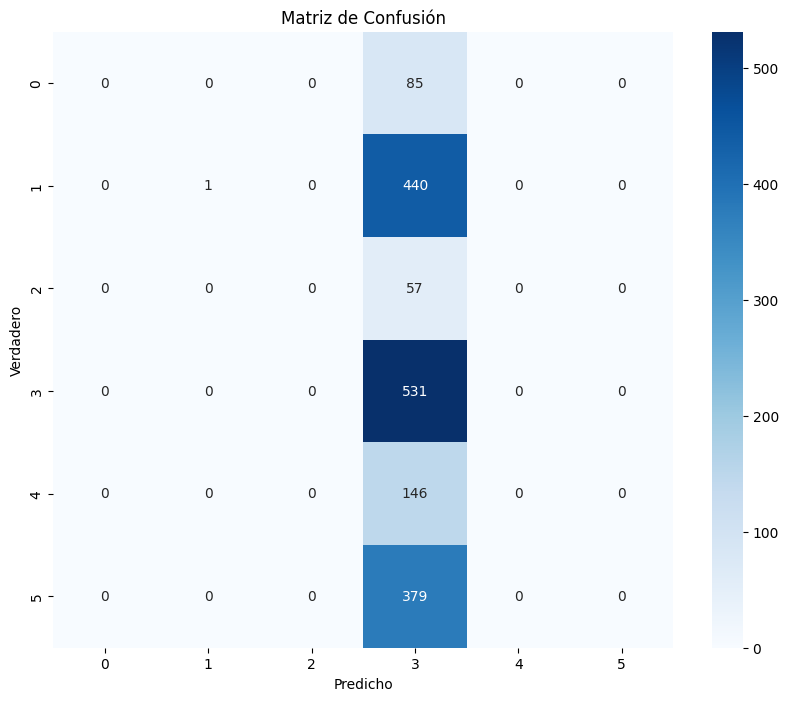


Evaluando BiGRU:
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.50      0.00      0.01       441
           2       0.00      0.00      0.00        57
           3       0.32      0.99      0.49       531
           4       0.00      0.00      0.00       146
           5       0.00      0.00      0.00       379

    accuracy                           0.32      1639
   macro avg       0.14      0.17      0.08      1639
weighted avg       0.24      0.32      0.16      1639



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


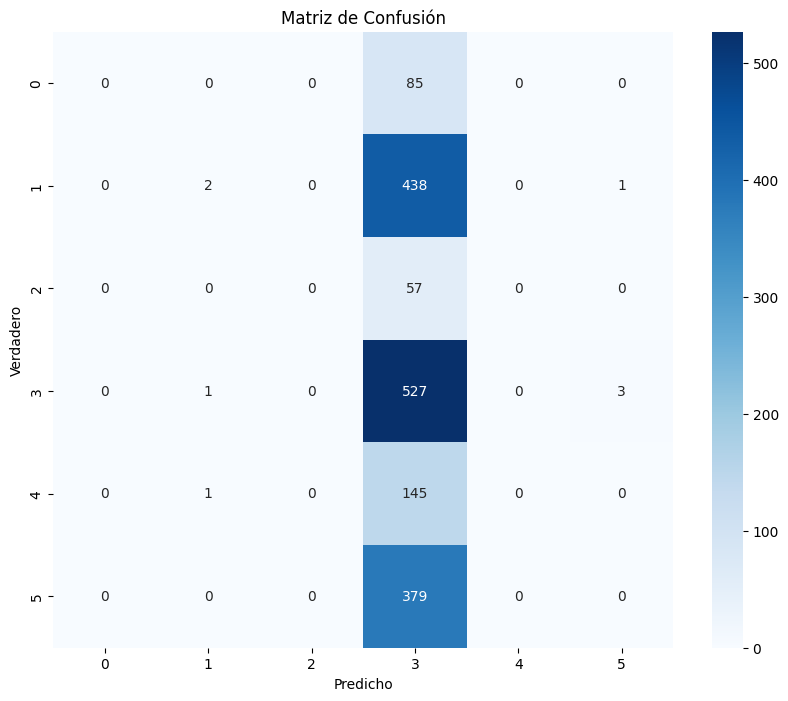


Evaluando Transformer:
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.00      0.00      0.00       441
           2       0.00      0.00      0.00        57
           3       0.32      1.00      0.49       531
           4       0.00      0.00      0.00       146
           5       0.00      0.00      0.00       379

    accuracy                           0.32      1639
   macro avg       0.05      0.17      0.08      1639
weighted avg       0.10      0.32      0.16      1639



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


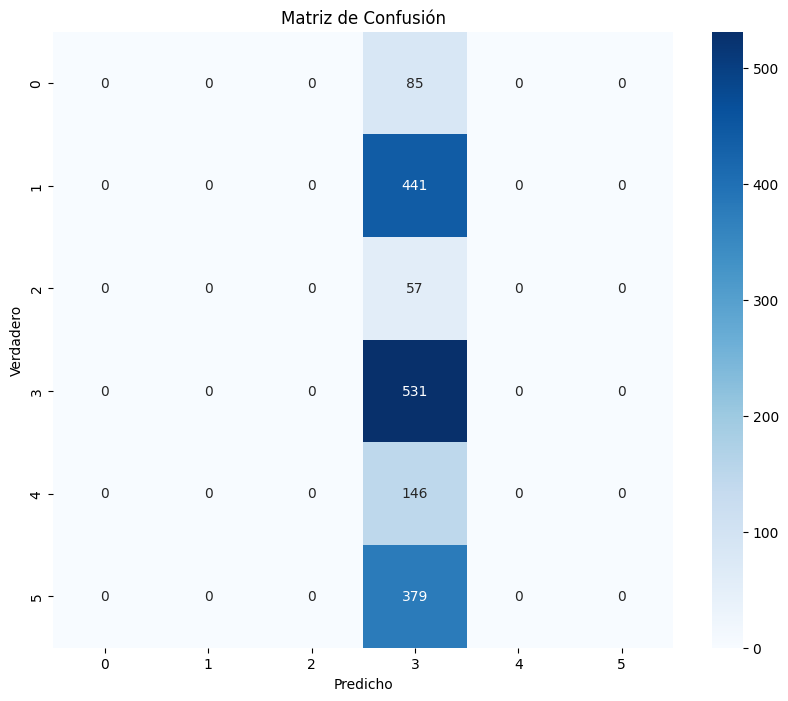

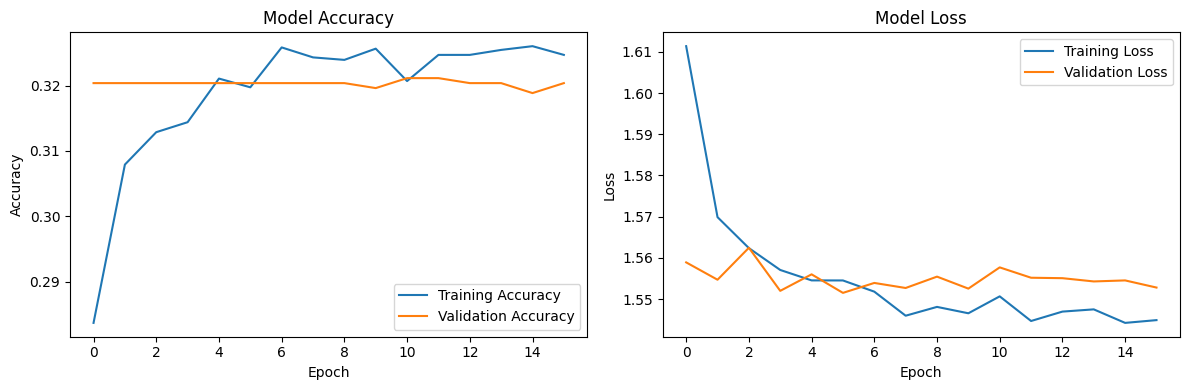

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    LSTM, GRU, Bidirectional, Dense, Dropout,
    Embedding, MultiHeadAttention, LayerNormalization,
    GlobalAveragePooling1D, Input
)
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns

class PlaylistSequentialClassifier:
    def __init__(self, df_playlists, df_processed, max_sequence_length=50):
        """
        df_playlists: DataFrame con info de playlists (tu primer dataset)
        df_processed: DataFrame con info específica de cada canción (tu segundo dataset)
        max_sequence_length: Longitud máxima de secuencia para padding
        """
        self.df_playlists = df_playlists
        self.df_processed = df_processed
        self.max_sequence_length = max_sequence_length
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()

        # Columnas de características musicales (ajusta según tus datos)
        self.feature_columns = [
            'bpm', 'energy', 'danceability_danceable', 'loudness',
            'mood_acoustic_acoustic', 'voice_instrumental_instrumental',
        ]

    def create_sequences(self):
        """
        Crea secuencias de características musicales para cada playlist
        """
        print("Creando secuencias de características musicales...")

        sequences = []
        labels = []
        playlist_ids = []

        # Asumiendo que df_processed tiene una columna 'playlist_id' o 'pid'
        # Si no, necesitarás ajustar esto según tu estructura de datos

        for idx, playlist in self.df_playlists.iterrows():
            pid = playlist['pid']

            # Filtrar canciones de esta playlist
            playlist_songs = self.df_processed[self.df_processed['pid'] == pid]

            if len(playlist_songs) == 0:
                continue

            # Extraer características musicales
            song_features = playlist_songs[self.feature_columns].values

            # Normalizar características
            if len(song_features) > 0:
                sequences.append(song_features)
                labels.append(playlist['playlist_labels_kmeans'])  # o playlist_labels_hdbscan
                playlist_ids.append(pid)

        # Padding de secuencias
        self.sequences = pad_sequences(
            sequences,
            maxlen=self.max_sequence_length,
            dtype='float32',
            padding='post',
            truncating='post'
        )

        # Encode labels
        self.labels = self.label_encoder.fit_transform(labels)
        self.num_classes = len(np.unique(self.labels))

        print(f"Secuencias creadas: {len(self.sequences)}")
        print(f"Forma de secuencias: {self.sequences.shape}")
        print(f"Número de clases: {self.num_classes}")

        return self.sequences, self.labels

    def normalize_features(self):
        """
        Normaliza las características en las secuencias
        """
        print("Normalizando características...")

        # Reshape para normalizar
        original_shape = self.sequences.shape
        sequences_reshaped = self.sequences.reshape(-1, original_shape[-1])

        # Normalizar
        sequences_normalized = self.scaler.fit_transform(sequences_reshaped)

        # Reshape back
        self.sequences = sequences_normalized.reshape(original_shape)

        return self.sequences

    def build_lstm_model(self, units=128, dropout_rate=0.3):
        """
        Construye modelo BiLSTM
        """
        model = Sequential([
            Bidirectional(LSTM(units, return_sequences=True, dropout=dropout_rate),
                         input_shape=(self.max_sequence_length, len(self.feature_columns))),
            Bidirectional(LSTM(units//2, dropout=dropout_rate)),
            Dense(64, activation='relu'),
            Dropout(dropout_rate),
            Dense(32, activation='relu'),
            Dropout(dropout_rate),
            Dense(self.num_classes, activation='softmax')
        ])

        model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

    def build_gru_model(self, units=128, dropout_rate=0.3):
        """
        Construye modelo BiGRU
        """
        model = Sequential([
            Bidirectional(GRU(units, return_sequences=True, dropout=dropout_rate),
                         input_shape=(self.max_sequence_length, len(self.feature_columns))),
            Bidirectional(GRU(units//2, dropout=dropout_rate)),
            Dense(64, activation='relu'),
            Dropout(dropout_rate),
            Dense(32, activation='relu'),
            Dropout(dropout_rate),
            Dense(self.num_classes, activation='softmax')
        ])

        model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

    def build_transformer_model(self, d_model=64, num_heads=8, ff_dim=128, dropout_rate=0.3):
        """
        Construye modelo Transformer
        """
        inputs = Input(shape=(self.max_sequence_length, len(self.feature_columns)))

        # Projection to d_model
        x = Dense(d_model)(inputs)

        # Multi-head attention
        attention_output = MultiHeadAttention(
            num_heads=num_heads,
            key_dim=d_model//num_heads,
            dropout=dropout_rate
        )(x, x)

        # Add & Norm
        x = LayerNormalization()(x + attention_output)

        # Feed Forward
        ff_output = Dense(ff_dim, activation='relu')(x)
        ff_output = Dropout(dropout_rate)(ff_output)
        ff_output = Dense(d_model)(ff_output)

        # Add & Norm
        x = LayerNormalization()(x + ff_output)

        # Global pooling
        x = GlobalAveragePooling1D()(x)

        # Classification head
        x = Dense(64, activation='relu')(x)
        x = Dropout(dropout_rate)(x)
        x = Dense(32, activation='relu')(x)
        x = Dropout(dropout_rate)(x)
        outputs = Dense(self.num_classes, activation='softmax')(x)

        model = Model(inputs, outputs)
        model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

    def train_model(self, model, validation_split=0.2, epochs=50, batch_size=32):
        """
        Entrena el modelo
        """
        callbacks = [
            EarlyStopping(patience=10, restore_best_weights=True),
            ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-7)
        ]

        history = model.fit(
            self.sequences, self.labels,
            validation_split=validation_split,
            epochs=epochs,
            batch_size=batch_size,
            callbacks=callbacks,
            verbose=1
        )

        return history

    def evaluate_model(self, model, X_test, y_test):
        """
        Evalúa el modelo
        """
        # Predicciones
        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)

        # Métricas
        print("\nReporte de clasificación:")
        print(classification_report(y_test, y_pred_classes))

        # Matriz de confusión
        cm = confusion_matrix(y_test, y_pred_classes)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Matriz de Confusión')
        plt.ylabel('Verdadero')
        plt.xlabel('Predicho')
        plt.show()

        return y_pred_classes

    def plot_training_history(self, history):
        """
        Plotea el historial de entrenamiento
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

        # Accuracy
        ax1.plot(history.history['accuracy'], label='Training Accuracy')
        ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
        ax1.set_title('Model Accuracy')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Accuracy')
        ax1.legend()

        # Loss
        ax2.plot(history.history['loss'], label='Training Loss')
        ax2.plot(history.history['val_loss'], label='Validation Loss')
        ax2.set_title('Model Loss')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.legend()

        plt.tight_layout()
        plt.show()

# Ejemplo de uso
def main():
    # Cargar datos (ajusta las rutas según tus archivos)
    # df_playlists = pd.read_csv('path_to_playlists.csv')
    # df_processed = pd.read_csv('path_to_processed_songs.csv')

    # Inicializar clasificador
    classifier = PlaylistSequentialClassifier(df_playlist, df_tracks)

    # Crear secuencias
    sequences, labels = classifier.create_sequences()

    # Normalizar características
    sequences = classifier.normalize_features()

    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(
        sequences, labels, test_size=0.2, random_state=42, stratify=labels
    )

    # Actualizar secuencias para entrenamiento
    classifier.sequences = X_train
    classifier.labels = y_train

    # Opción 1: Modelo BiLSTM
    print("Entrenando modelo BiLSTM...")
    lstm_model = classifier.build_lstm_model()
    lstm_history = classifier.train_model(lstm_model)

    # Opción 2: Modelo BiGRU
    print("\nEntrenando modelo BiGRU...")
    gru_model = classifier.build_gru_model()
    gru_history = classifier.train_model(gru_model)

    # Opción 3: Modelo Transformer
    print("\nEntrenando modelo Transformer...")
    transformer_model = classifier.build_transformer_model()
    transformer_history = classifier.train_model(transformer_model)

    # Evaluar modelos
    print("\nEvaluando BiLSTM:")
    classifier.evaluate_model(lstm_model, X_test, y_test)

    print("\nEvaluando BiGRU:")
    classifier.evaluate_model(gru_model, X_test, y_test)

    print("\nEvaluando Transformer:")
    classifier.evaluate_model(transformer_model, X_test, y_test)

    # Plotear historiales
    classifier.plot_training_history(lstm_history)

if __name__ == "__main__":
    main()

Creando secuencias de características musicales...
Secuencias creadas: 8192
Forma de secuencias: (8192, 50, 6)
Número de clases: 83
Normalizando características...
Entrenando modelo BiLSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 54s 277ms/step - accuracy: 0.3251 - loss: 3.7939 - val_accuracy: 0.4127 - val_loss: 3.2103 - learning_rate: 0.0010
Epoch 2/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 80s 268ms/step - accuracy: 0.3992 - loss: 3.3668 - val_accuracy: 0.4127 - val_loss: 3.1733 - learning_rate: 0.0010
Epoch 3/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 81s 260ms/step - accuracy: 0.4085 - loss: 3.2698 - val_accuracy: 0.4127 - val_loss: 3.2122 - learning_rate: 0.0010
Epoch 4/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 42s 256ms/step - accuracy: 0.4111 - loss: 3.2693 - val_accuracy: 0.4127 - val_loss: 3.1648 - learning_rate: 0.0010
Epoch 5/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 83s 262ms/step - accuracy: 0.4218 - loss: 3.2223 - val_accuracy: 0.4127 - val_loss: 3.1741 - learning_rate: 0.0010
Epoch 6/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 81s 255ms/step - accuracy: 0.4202 - loss: 3.2000 - val_accuracy: 0.4127 - val_loss: 3.1669 - learning_rate: 0.0010
Epoch 7/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 82s 253ms/step - accuracy: 0.4

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


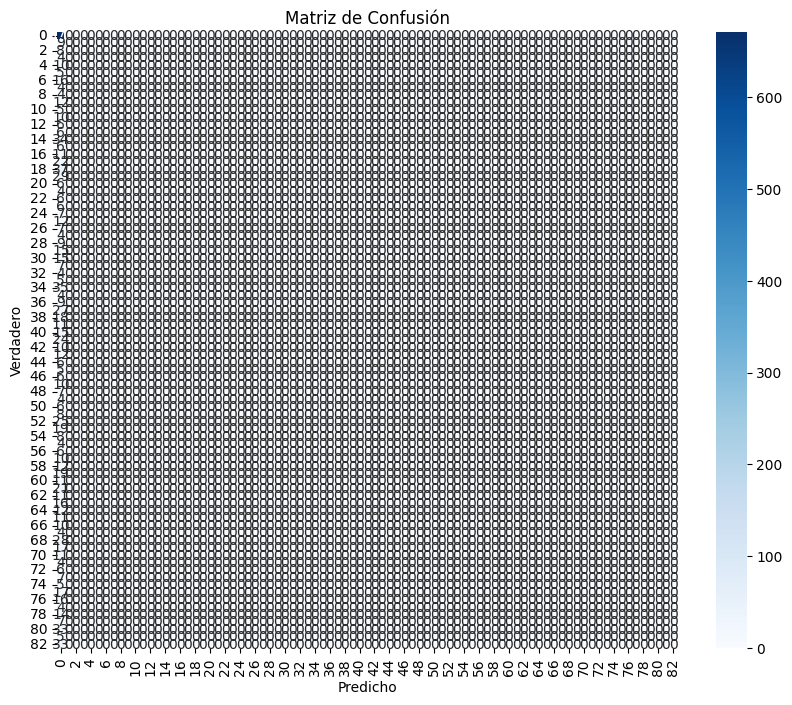


Evaluando BiGRU:
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.41      1.00      0.58       671
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00        34
          15       0.00      0.00      0.00       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


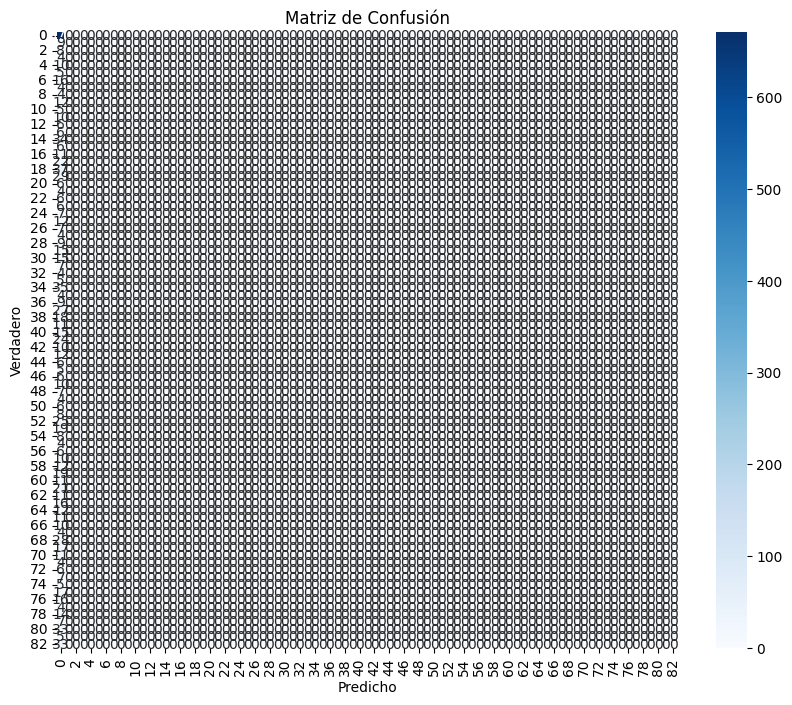


Evaluando Transformer:
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.41      1.00      0.58       671
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00        34
          15       0.00      0.00      0.00 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


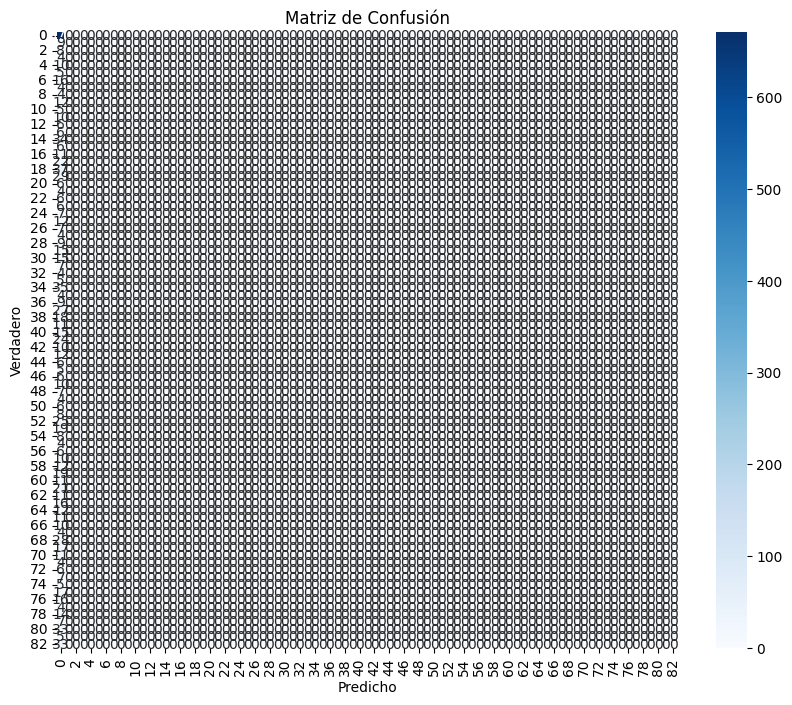

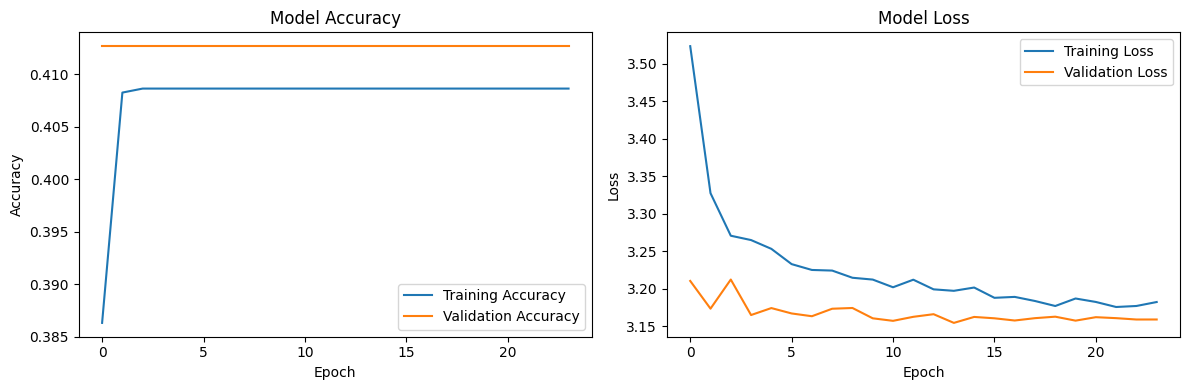

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    LSTM, GRU, Bidirectional, Dense, Dropout,
    Embedding, MultiHeadAttention, LayerNormalization,
    GlobalAveragePooling1D, Input
)
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns

class PlaylistSequentialClassifier:
    def __init__(self, df_playlists, df_processed, max_sequence_length=50):
        """
        df_playlists: DataFrame con info de playlists (tu primer dataset)
        df_processed: DataFrame con info específica de cada canción (tu segundo dataset)
        max_sequence_length: Longitud máxima de secuencia para padding
        """
        self.df_playlists = df_playlists
        self.df_processed = df_processed
        self.max_sequence_length = max_sequence_length
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()

        # Columnas de características musicales (ajusta según tus datos)
        self.feature_columns = [
            'bpm', 'energy', 'danceability_danceable', 'loudness',
            'mood_acoustic_acoustic', 'voice_instrumental_instrumental',
        ]

    def create_sequences(self):
        """
        Crea secuencias de características musicales para cada playlist
        """
        print("Creando secuencias de características musicales...")

        sequences = []
        labels = []
        playlist_ids = []

        # Asumiendo que df_processed tiene una columna 'playlist_id' o 'pid'
        # Si no, necesitarás ajustar esto según tu estructura de datos

        for idx, playlist in self.df_playlists.iterrows():
            pid = playlist['pid']

            # Filtrar canciones de esta playlist
            playlist_songs = self.df_processed[self.df_processed['pid'] == pid]

            if len(playlist_songs) == 0:
                continue

            # Extraer características musicales
            song_features = playlist_songs[self.feature_columns].values

            # Normalizar características
            if len(song_features) > 0:
                sequences.append(song_features)
                labels.append(playlist['playlist_labels_hdbscan'])  # o playlist_labels_hdbscan
                playlist_ids.append(pid)

        # Padding de secuencias
        self.sequences = pad_sequences(
            sequences,
            maxlen=self.max_sequence_length,
            dtype='float32',
            padding='post',
            truncating='post'
        )

        # Encode labels
        self.labels = self.label_encoder.fit_transform(labels)
        self.num_classes = len(np.unique(self.labels))

        print(f"Secuencias creadas: {len(self.sequences)}")
        print(f"Forma de secuencias: {self.sequences.shape}")
        print(f"Número de clases: {self.num_classes}")

        return self.sequences, self.labels

    def normalize_features(self):
        """
        Normaliza las características en las secuencias
        """
        print("Normalizando características...")

        # Reshape para normalizar
        original_shape = self.sequences.shape
        sequences_reshaped = self.sequences.reshape(-1, original_shape[-1])

        # Normalizar
        sequences_normalized = self.scaler.fit_transform(sequences_reshaped)

        # Reshape back
        self.sequences = sequences_normalized.reshape(original_shape)

        return self.sequences

    def build_lstm_model(self, units=128, dropout_rate=0.3):
        """
        Construye modelo BiLSTM
        """
        model = Sequential([
            Bidirectional(LSTM(units, return_sequences=True, dropout=dropout_rate),
                         input_shape=(self.max_sequence_length, len(self.feature_columns))),
            Bidirectional(LSTM(units//2, dropout=dropout_rate)),
            Dense(64, activation='relu'),
            Dropout(dropout_rate),
            Dense(32, activation='relu'),
            Dropout(dropout_rate),
            Dense(self.num_classes, activation='softmax')
        ])

        model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

    def build_gru_model(self, units=128, dropout_rate=0.3):
        """
        Construye modelo BiGRU
        """
        model = Sequential([
            Bidirectional(GRU(units, return_sequences=True, dropout=dropout_rate),
                         input_shape=(self.max_sequence_length, len(self.feature_columns))),
            Bidirectional(GRU(units//2, dropout=dropout_rate)),
            Dense(64, activation='relu'),
            Dropout(dropout_rate),
            Dense(32, activation='relu'),
            Dropout(dropout_rate),
            Dense(self.num_classes, activation='softmax')
        ])

        model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

    def build_transformer_model(self, d_model=64, num_heads=8, ff_dim=128, dropout_rate=0.3):
        """
        Construye modelo Transformer
        """
        inputs = Input(shape=(self.max_sequence_length, len(self.feature_columns)))

        # Projection to d_model
        x = Dense(d_model)(inputs)

        # Multi-head attention
        attention_output = MultiHeadAttention(
            num_heads=num_heads,
            key_dim=d_model//num_heads,
            dropout=dropout_rate
        )(x, x)

        # Add & Norm
        x = LayerNormalization()(x + attention_output)

        # Feed Forward
        ff_output = Dense(ff_dim, activation='relu')(x)
        ff_output = Dropout(dropout_rate)(ff_output)
        ff_output = Dense(d_model)(ff_output)

        # Add & Norm
        x = LayerNormalization()(x + ff_output)

        # Global pooling
        x = GlobalAveragePooling1D()(x)

        # Classification head
        x = Dense(64, activation='relu')(x)
        x = Dropout(dropout_rate)(x)
        x = Dense(32, activation='relu')(x)
        x = Dropout(dropout_rate)(x)
        outputs = Dense(self.num_classes, activation='softmax')(x)

        model = Model(inputs, outputs)
        model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

    def train_model(self, model, validation_split=0.2, epochs=50, batch_size=32):
        """
        Entrena el modelo
        """
        callbacks = [
            EarlyStopping(patience=10, restore_best_weights=True),
            ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-7)
        ]

        history = model.fit(
            self.sequences, self.labels,
            validation_split=validation_split,
            epochs=epochs,
            batch_size=batch_size,
            callbacks=callbacks,
            verbose=1
        )

        return history

    def evaluate_model(self, model, X_test, y_test):
        """
        Evalúa el modelo
        """
        # Predicciones
        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)

        # Métricas
        print("\nReporte de clasificación:")
        print(classification_report(y_test, y_pred_classes))

        # Matriz de confusión
        cm = confusion_matrix(y_test, y_pred_classes)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Matriz de Confusión')
        plt.ylabel('Verdadero')
        plt.xlabel('Predicho')
        plt.show()

        return y_pred_classes

    def plot_training_history(self, history):
        """
        Plotea el historial de entrenamiento
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

        # Accuracy
        ax1.plot(history.history['accuracy'], label='Training Accuracy')
        ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
        ax1.set_title('Model Accuracy')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Accuracy')
        ax1.legend()

        # Loss
        ax2.plot(history.history['loss'], label='Training Loss')
        ax2.plot(history.history['val_loss'], label='Validation Loss')
        ax2.set_title('Model Loss')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.legend()

        plt.tight_layout()
        plt.show()

# Ejemplo de uso
def main():
    # Cargar datos (ajusta las rutas según tus archivos)
    # df_playlists = pd.read_csv('path_to_playlists.csv')
    # df_processed = pd.read_csv('path_to_processed_songs.csv')

    # Inicializar clasificador
    classifier = PlaylistSequentialClassifier(df_playlist, df_tracks)

    # Crear secuencias
    sequences, labels = classifier.create_sequences()

    # Normalizar características
    sequences = classifier.normalize_features()

    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(
        sequences, labels, test_size=0.2, random_state=42, stratify=labels
    )

    # Actualizar secuencias para entrenamiento
    classifier.sequences = X_train
    classifier.labels = y_train

    # Opción 1: Modelo BiLSTM
    print("Entrenando modelo BiLSTM...")
    lstm_model = classifier.build_lstm_model()
    lstm_history = classifier.train_model(lstm_model)

    # Opción 2: Modelo BiGRU
    print("\nEntrenando modelo BiGRU...")
    gru_model = classifier.build_gru_model()
    gru_history = classifier.train_model(gru_model)

    # Opción 3: Modelo Transformer
    print("\nEntrenando modelo Transformer...")
    transformer_model = classifier.build_transformer_model()
    transformer_history = classifier.train_model(transformer_model)

    # Evaluar modelos
    print("\nEvaluando BiLSTM:")
    classifier.evaluate_model(lstm_model, X_test, y_test)

    print("\nEvaluando BiGRU:")
    classifier.evaluate_model(gru_model, X_test, y_test)

    print("\nEvaluando Transformer:")
    classifier.evaluate_model(transformer_model, X_test, y_test)

    # Plotear historiales
    classifier.plot_training_history(lstm_history)

    # Define directory to save models
    model_dir = Path(root/'models')
    model_dir.mkdir(exist_ok=True)

    # Save the models
    print("\nSaving models...")
    lstm_model.save(model_dir / 'lstm_model.h5')
    gru_model.save(model_dir / 'gru_model.h5')
    transformer_model.save(model_dir / 'transformer_model.h5')

    print(f"Models saved to {model_dir}")


if __name__ == "__main__":
    main()

In [30]:


# You can verify the saved files
!ls {model_dir}



Saving models...


NameError: name 'lstm_model' is not defined